In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load data
df = pd.read_csv("happiness_clean_2015_2019_20251110_190504.csv")

In [ ]:
df.head()

,country,year,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom,generosity,corruption,rank,region
0,Afghanistan,2015,3.575,0.31982,0.30285,0.30335,0.23414,0.36510,0.09719,153.0,Southern Asia
1,Afghanistan,2016,3.360,0.38227,0.11037,0.17344,0.16430,0.31268,0.07112,154.0,Southern Asia
2,Afghanistan,2018,3.632,0.33200,0.53700,0.25500,0.08500,0.19100,0.03600,145.0,NaN
3,Afghanistan,2019,3.203,0.35000,0.51700,0.36100,0.00000,0.15800,0.02500,154.0,NaN
4,Albania,2015,4.959,0.87867,0.80434,0.81325,0.35733,0.14272,0.06413,95.0,Central and Eastern Europe


# Cofficient Calculation

In [ ]:
#Filter the columns that are important for analysis
COLUMNS_OF_INTEREST = [
    'year',
    'happiness_score',
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom',
    'generosity',
    'corruption',
    'rank'
]

In [ ]:
df = df[COLUMNS_OF_INTEREST]

# Heatmap for Coefficient Matrix

<Axes: >

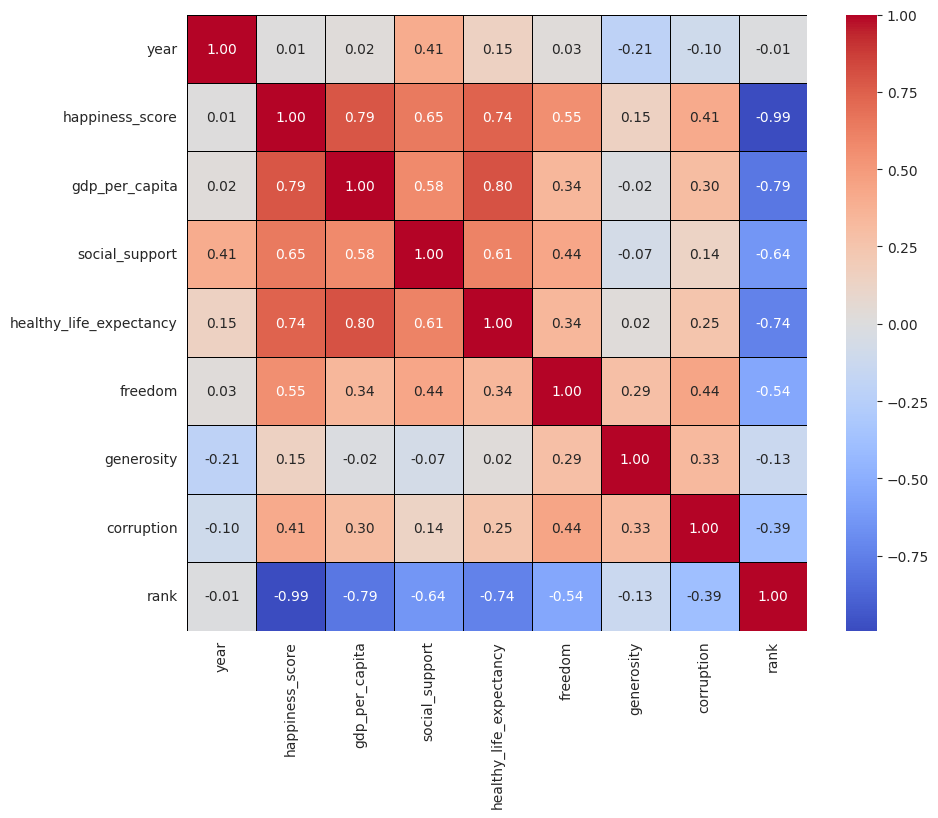

In [ ]:
plt.figure(figsize=(10, 8))

# Find the independent variables that have strong cofficient to happiness_score
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    linecolor='black',
    cbar=True
)



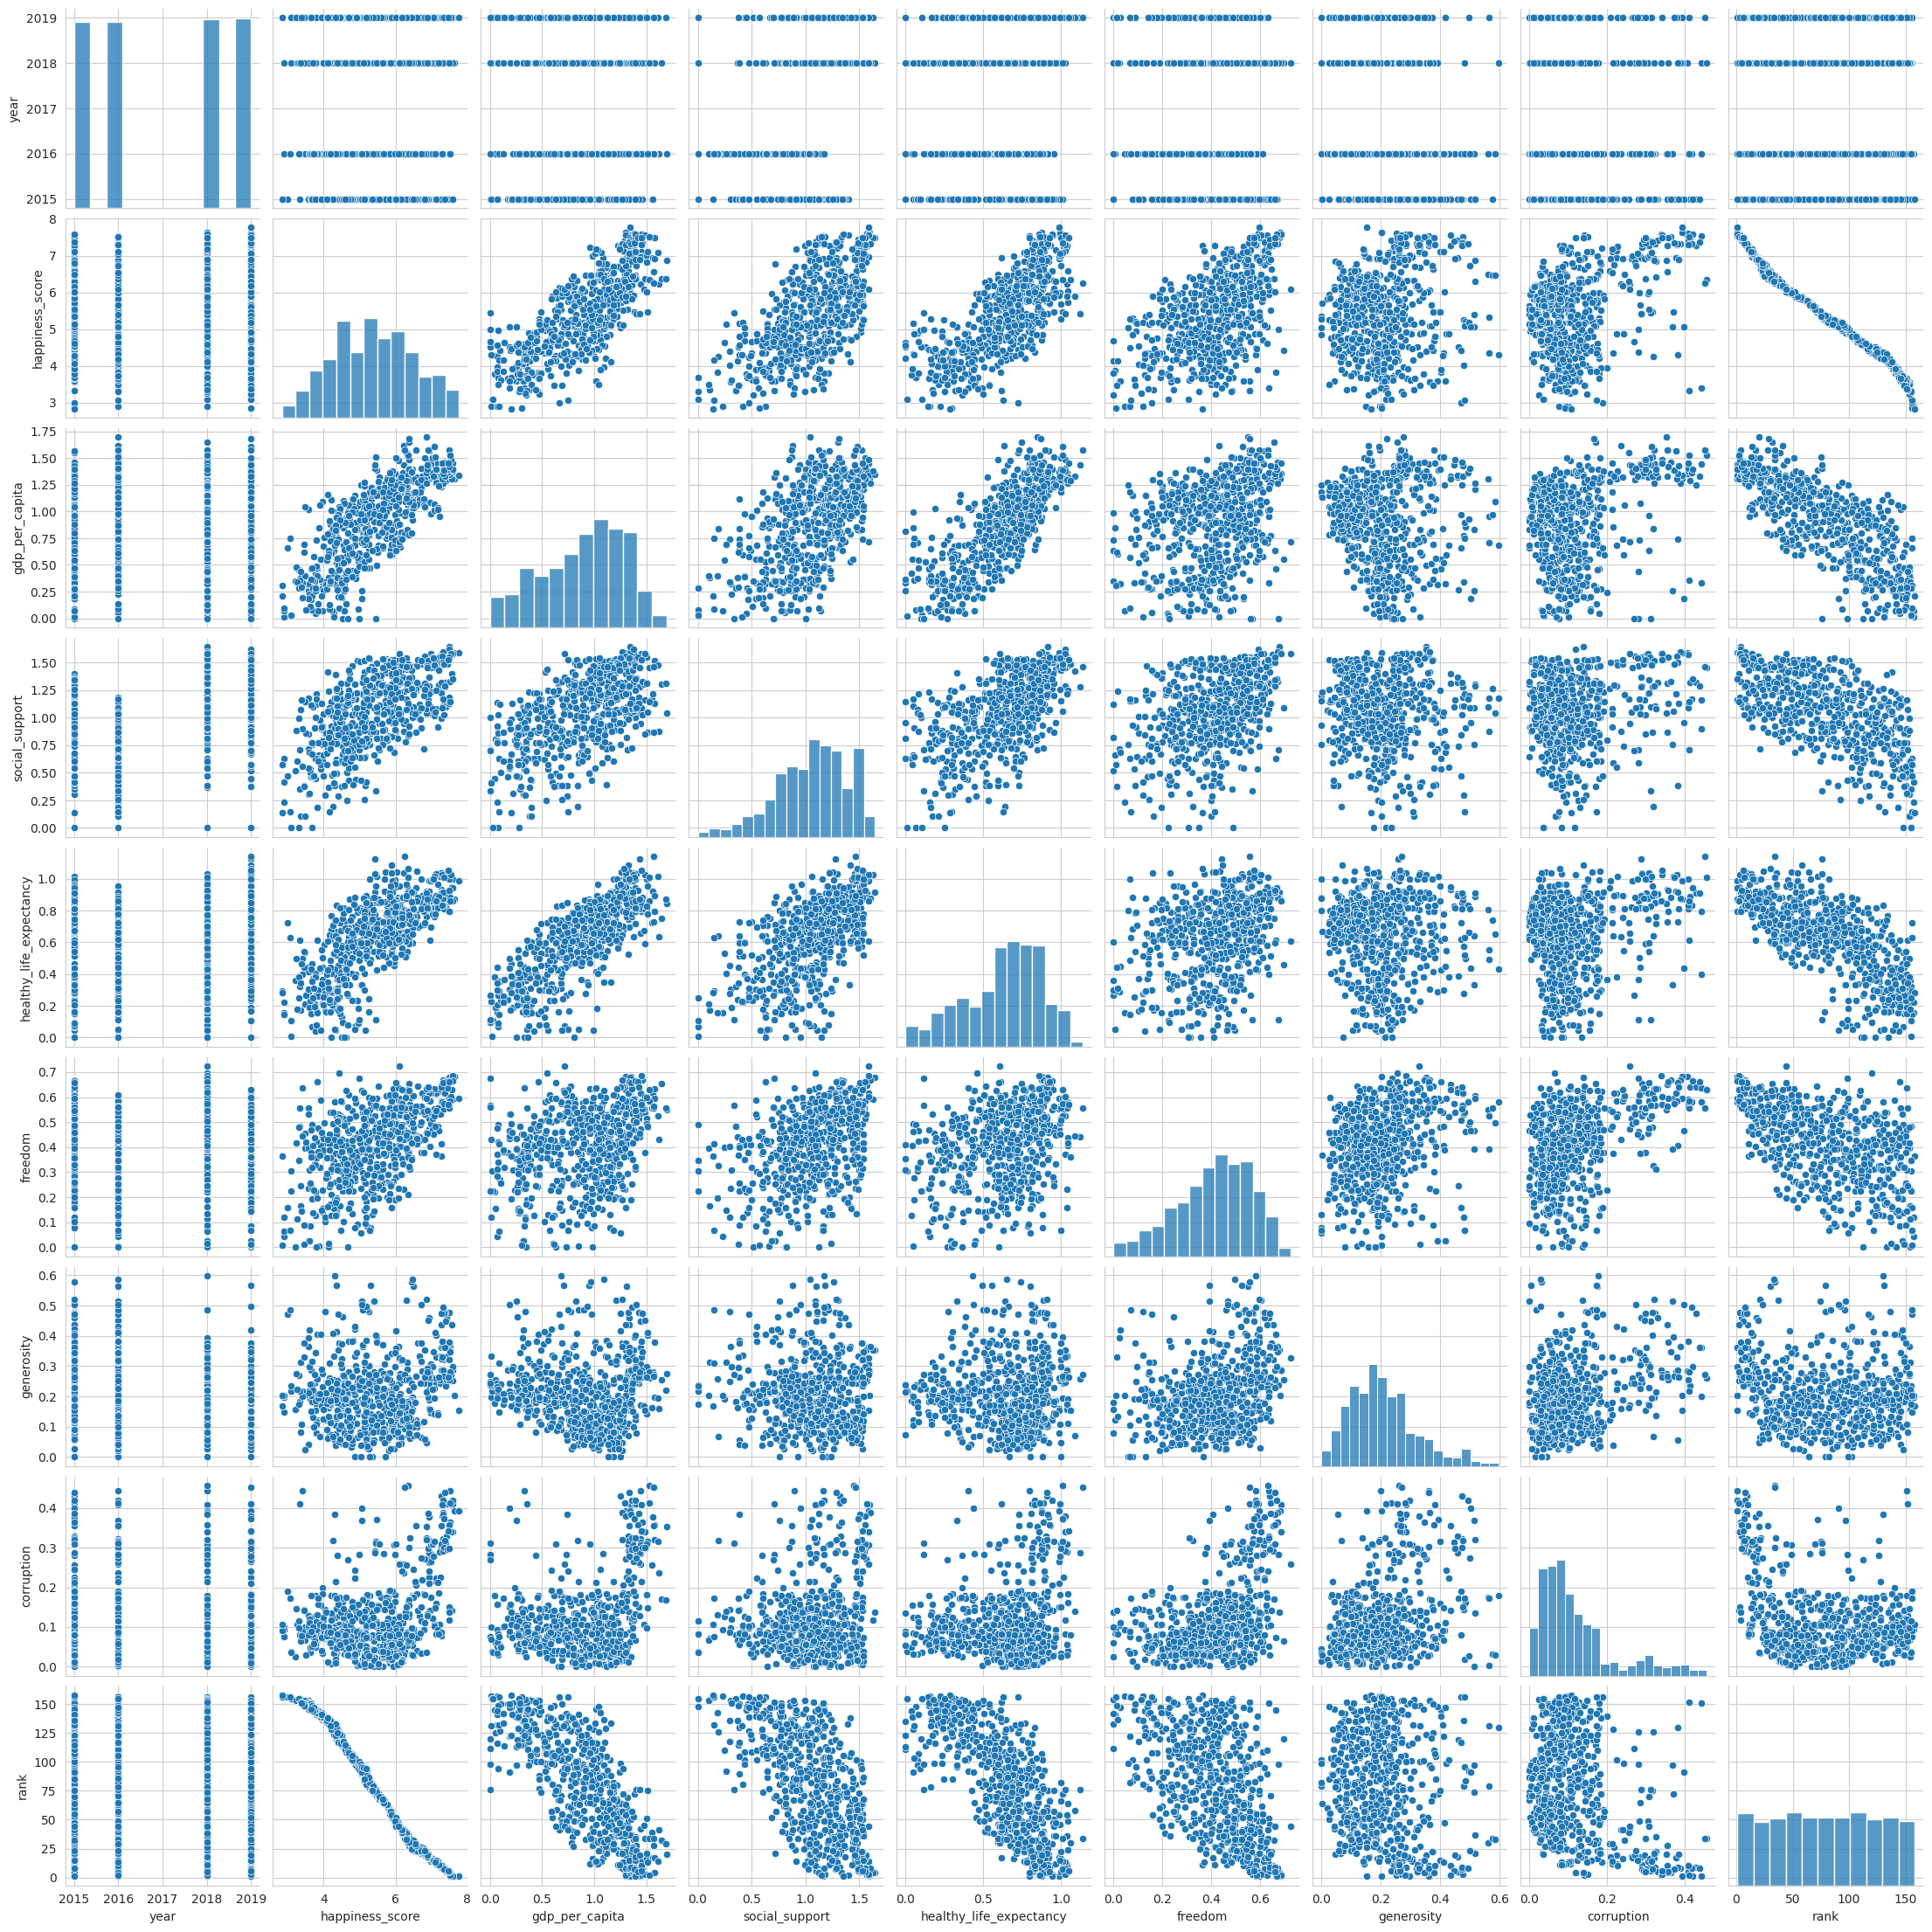

In [ ]:
sns.pairplot(df)
plt.show()

# Simple Scatter Plot

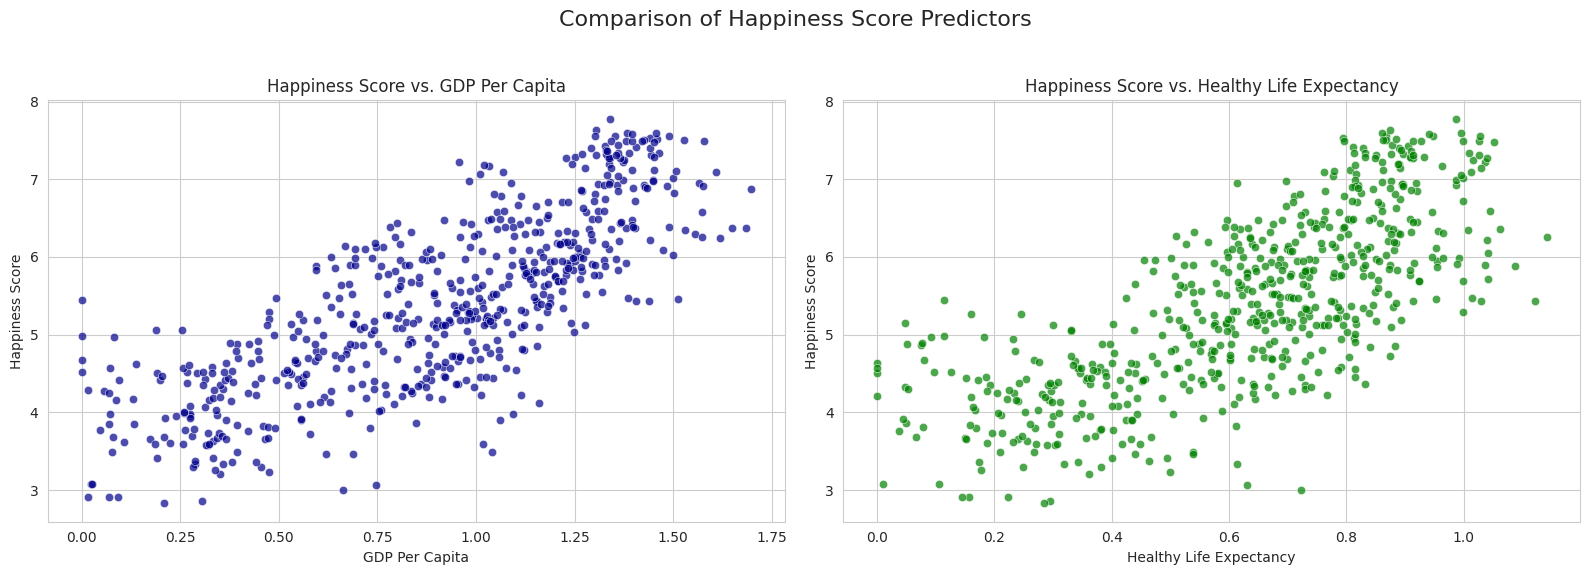

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparison of Happiness Score Predictors', fontsize=16)

# Plot 1: happiness_score vs. gdp_per_capita (Left Subplot)
sns.scatterplot(x='gdp_per_capita', y='happiness_score', data=df, color='darkblue', alpha=0.7, ax=axes[0])
axes[0].set_title('Happiness Score vs. GDP Per Capita', fontsize=12)
axes[0].set_xlabel('GDP Per Capita')
axes[0].set_ylabel('Happiness Score')

# Plot 2: happiness_score vs. healthy_life_expectancy (Right Subplot)
sns.scatterplot(x='healthy_life_expectancy', y='happiness_score', data=df, color='green', alpha=0.7, ax=axes[1])
axes[1].set_title('Happiness Score vs. Healthy Life Expectancy', fontsize=12)
axes[1].set_xlabel('Healthy Life Expectancy')
axes[1].set_ylabel('Happiness Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Bin-scatter plot

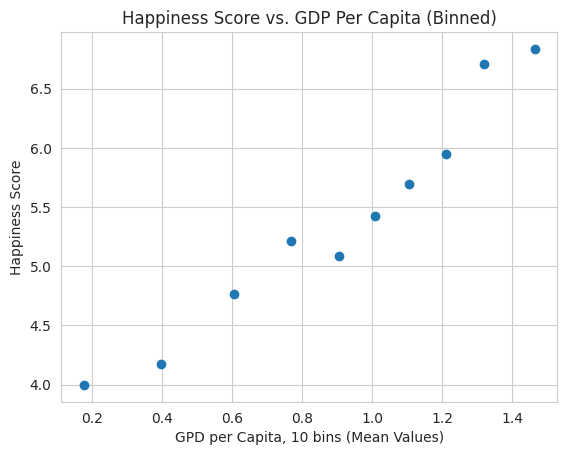

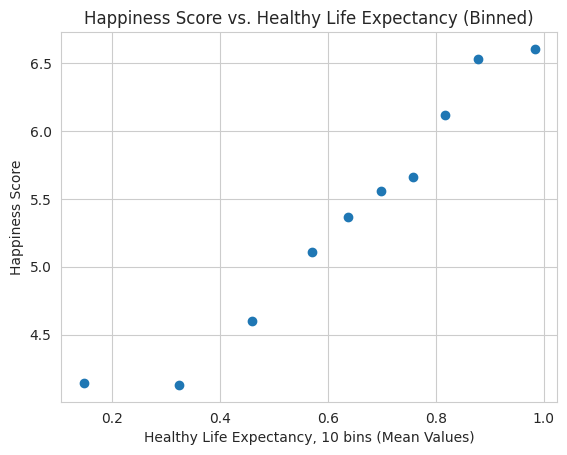

In [ ]:
# Create gdp10bins (categorical) on a copy of df to avoid modifying global df
df_temp_gdp = df.copy()
df_temp_gdp["gdp10bins_cat"] = pd.qcut(df_temp_gdp["gdp_per_capita"], 10)

# Calculate summary to get bin means for numeric x-axis
df_summary_gdp = (
    df_temp_gdp.filter(["gdp_per_capita", "gdp10bins_cat"])
    .groupby("gdp10bins_cat", observed=False)
    .agg(min=("gdp_per_capita", "min"), max=("gdp_per_capita", "max"),
         mean=("gdp_per_capita", "mean"), median=("gdp_per_capita", "median"),
         std=("gdp_per_capita", "std"), size=("gdp_per_capita", "size"))
)

# Map categorical bins to their mean GDP values for plotting
gdp_bin_means = df_summary_gdp["mean"].to_dict()

# Group by the categorical bins and calculate mean happiness score
df_gdp_binned = (
    df_temp_gdp.groupby("gdp10bins_cat", observed=False)
    .agg(happiness_score_gdp10bins=("happiness_score", "mean"))
    .reset_index()
)

# Use the numeric mean values for the x-axis
df_gdp_binned['gdp10bins_numeric'] = df_gdp_binned['gdp10bins_cat'].map(gdp_bin_means)

x_gdp = df_gdp_binned['gdp10bins_numeric']
y_gdp = df_gdp_binned['happiness_score_gdp10bins']
plt.scatter(x_gdp, y_gdp)
plt.xlabel('GPD per Capita, 10 bins (Mean Values)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. GDP Per Capita (Binned)')
plt.show()

# Create healthy_life_expectancy_10bins (categorical) on a copy of df
df_temp_hle = df.copy() # Re-copy df to ensure clean state if any intermediate df_temp modification occurred
df_temp_hle["healthy_life_expectancy_10bins_cat"] = pd.qcut(df_temp_hle["healthy_life_expectancy"], 10)

df_summary_hle = (
    df_temp_hle.filter(["healthy_life_expectancy", "healthy_life_expectancy_10bins_cat"])
    .groupby("healthy_life_expectancy_10bins_cat", observed=False)
    .agg(min=("healthy_life_expectancy", "min"), max=("healthy_life_expectancy", "max"),
         mean=("healthy_life_expectancy", "mean"), median=("healthy_life_expectancy", "median"),
         std=("healthy_life_expectancy", "std"), size=("healthy_life_expectancy", "size"))
)

hle_bin_means = df_summary_hle["mean"].to_dict()

df_hle_binned = (
    df_temp_hle.groupby("healthy_life_expectancy_10bins_cat", observed=False)
    .agg(happiness_score_hle_10bins=("happiness_score", "mean"))
    .reset_index()
)
df_hle_binned['healthy_life_expectancy_10bins_numeric'] = df_hle_binned['healthy_life_expectancy_10bins_cat'].map(hle_bin_means)


x_hle = df_hle_binned['healthy_life_expectancy_10bins_numeric']
y_hle = df_hle_binned['happiness_score_hle_10bins']
plt.scatter(x_hle, y_hle)
plt.xlabel('Healthy Life Expectancy, 10 bins (Mean Values)')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Healthy Life Expectancy (Binned)')
plt.show()

# Box Plot

In [ ]:
# create new column called gdp3bins
df['gdp3bins'] = np.nan # start with NaN

# Explicitly set column type to object before assigning string values for gdp3bins
df['gdp3bins'] = df['gdp3bins'].astype(object)

# Calculate quantiles for binning gdp_per_capita
q1_gdp = df['gdp_per_capita'].quantile(1/3)
q2_gdp = df['gdp_per_capita'].quantile(2/3)

# Set bins based on quantiles for gdp3bins
df.loc[df['gdp_per_capita'] < q1_gdp, 'gdp3bins'] = 'Low'
df.loc[(df['gdp_per_capita'] >= q1_gdp) & (df['gdp_per_capita'] < q2_gdp), 'gdp3bins'] = 'Medium'
df.loc[df['gdp_per_capita'] >= q2_gdp, 'gdp3bins'] = 'High'

# Calculate number of entries in each group for gdp3bins
print("Value counts for gdp3bins:")
print(df["gdp3bins"].value_counts())

# Create new column called hle3bins for healthy_life_expectancy
df['hle3bins'] = np.nan

# Calculate quantiles for binning healthy_life_expectancy
q1_hle = df['healthy_life_expectancy'].quantile(1/3)
q2_hle = df['healthy_life_expectancy'].quantile(2/3)

# Explicitly set column type to object before assigning string values
df['hle3bins'] = df['hle3bins'].astype(object)

# Set bins based on quantiles
df.loc[df['healthy_life_expectancy'] < q1_hle, 'hle3bins'] = 'Low'
df.loc[(df['healthy_life_expectancy'] >= q1_hle) & (df['healthy_life_expectancy'] < q2_hle), 'hle3bins'] = 'Medium'
df.loc[df['healthy_life_expectancy'] >= q2_hle, 'hle3bins'] = 'High'

# Calculate number of entries in each group for hle3bins
print("\nValue counts for hle3bins:")
print(df["hle3bins"].value_counts())

Value counts for gdp3bins:
gdp3bins
Low       206
High      206
Medium    205
Name: count, dtype: int64

Value counts for hle3bins:
hle3bins
Low       206
High      206
Medium    205
Name: count, dtype: int64


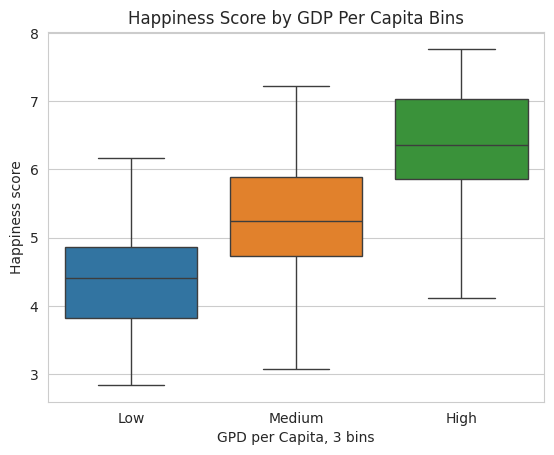

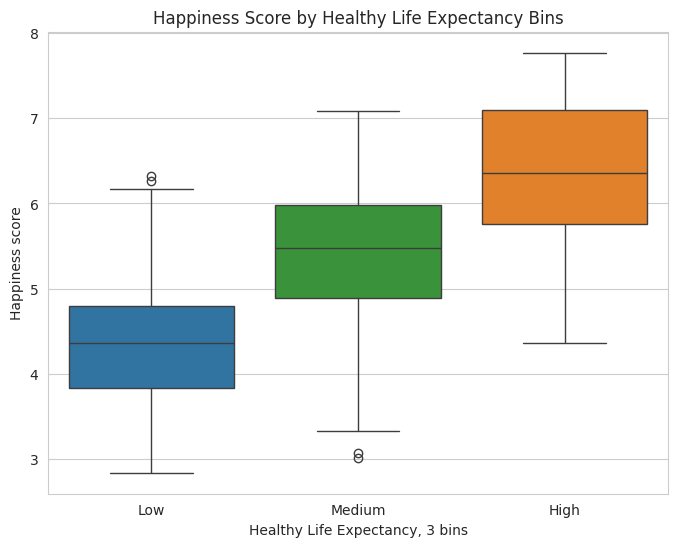

In [ ]:
ax = sns.boxplot(x='gdp3bins', y='happiness_score',
hue='gdp3bins', data=df)
ax.set(xlabel='GPD per Capita, 3 bins',
ylabel='Happiness score')
plt.title('Happiness Score by GDP Per Capita Bins')
plt.show()

# Create new column called hle3bins for healthy_life_expectancy
df['hle3bins'] = np.nan

# Calculate quantiles for binning healthy_life_expectancy
q1_hle = df['healthy_life_expectancy'].quantile(1/3)
q2_hle = df['healthy_life_expectancy'].quantile(2/3)

# Explicitly set column type to object before assigning string values
df['hle3bins'] = df['hle3bins'].astype(object)

# Set bins based on quantiles
df.loc[df['healthy_life_expectancy'] < q1_hle, 'hle3bins'] = 'Low'
df.loc[(df['healthy_life_expectancy'] >= q1_hle) & (df['healthy_life_expectancy'] < q2_hle), 'hle3bins'] = 'Medium'
df.loc[df['healthy_life_expectancy'] >= q2_hle, 'hle3bins'] = 'High'

# Generate the box plot for healthy_life_expectancy
plt.figure(figsize=(8, 6))
ax_hle = sns.boxplot(x='hle3bins', y='happiness_score',
hue='hle3bins', data=df, order=['Low', 'Medium', 'High'])
ax_hle.set(xlabel='Healthy Life Expectancy, 3 bins',
ylabel='Happiness score')
plt.title('Happiness Score by Healthy Life Expectancy Bins')
plt.show()

# Line Plot

In [ ]:
# Reload the original dataframe to ensure 'country' column is present
df1 = pd.read_csv("happiness_clean_2015_2019_20251110_190504.csv")

df_grouped = df1.groupby(['country', 'year'])['happiness_score'].mean().reset_index()
print(df_grouped.head())

       country  year  happiness_score
0  Afghanistan  2015            3.575
1  Afghanistan  2016            3.360
2  Afghanistan  2018            3.632
3  Afghanistan  2019            3.203
4      Albania  2015            4.959


In [ ]:
# Calculate the standard deviation of 'happiness_score'
df1_grouped = df1.groupby(['country', 'year'])['happiness_score'].mean().reset_index()
country_std_dev = df1_grouped.groupby('country')['happiness_score'].std()
print(country_std_dev.sort_values(ascending=False).head(30))

country
Venezuela       1.020821
Benin           0.706081
Lesotho         0.631051
Ivory Coast     0.609866
Togo            0.592786
Algeria         0.520675
Honduras        0.514318
Burkina Faso    0.494854
South Sudan     0.492160
Liberia         0.481727
Eswatini        0.463155
Gabon           0.454259
Zimbabwe        0.451494
Zambia          0.451157
Haiti           0.442468
Hungary         0.440608
Bulgaria        0.436773
Burundi         0.435000
Romania         0.429675
Malawi          0.428666
Guinea          0.426207
Cambodia        0.422070
Malaysia        0.413927
Latvia          0.398247
Somalia         0.388232
Botswana        0.385694
Cameroon        0.378405
Niger           0.367625
Senegal         0.367103
Congo           0.360942
Name: happiness_score, dtype: float64


In [ ]:
# To identify countries with a high standard deviation in happiness scores
highlight_countries = country_std_dev[country_std_dev > 0.4].index.tolist()
print("Countries to be highlighted (Std Dev > 0.4):")
print(highlight_countries)

Countries to be highlighted (Std Dev > 0.4):
['Algeria', 'Benin', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Eswatini', 'Gabon', 'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Ivory Coast', 'Lesotho', 'Liberia', 'Malawi', 'Malaysia', 'Romania', 'South Sudan', 'Togo', 'Venezuela', 'Zambia', 'Zimbabwe']


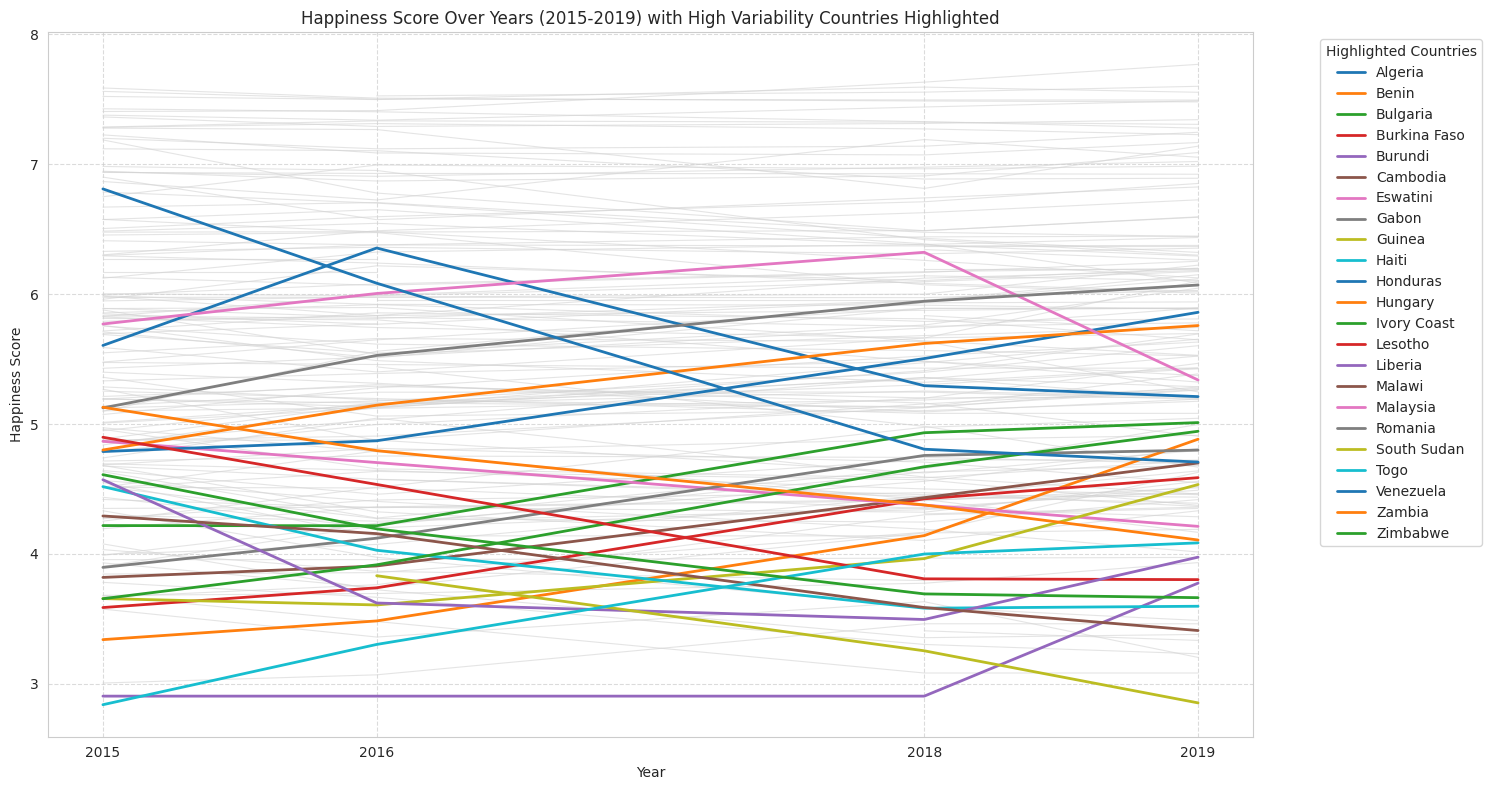

In [ ]:


plt.figure(figsize=(15, 8))

# Get all unique countries from df_grouped
all_countries = df_grouped['country'].unique()

# Plot all countries first with a light gray color
for country in all_countries:
    country_data = df_grouped[df_grouped['country'] == country]
    sns.lineplot(x='year', y='happiness_score', data=country_data, color='lightgray', linewidth=0.8, alpha=0.6, legend=False)

# Plot highlight countries with a distinct color
for country in highlight_countries:
    country_data = df_grouped[df_grouped['country'] == country]
    sns.lineplot(x='year', y='happiness_score', data=country_data, label=country, linewidth=2)

plt.title('Happiness Score Over Years (2015-2019) with High Variability Countries Highlighted')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Highlighted Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(sorted(df_grouped['year'].unique()))
plt.tight_layout()
plt.show()

# Heatmap of Happiness Score by Year × Country

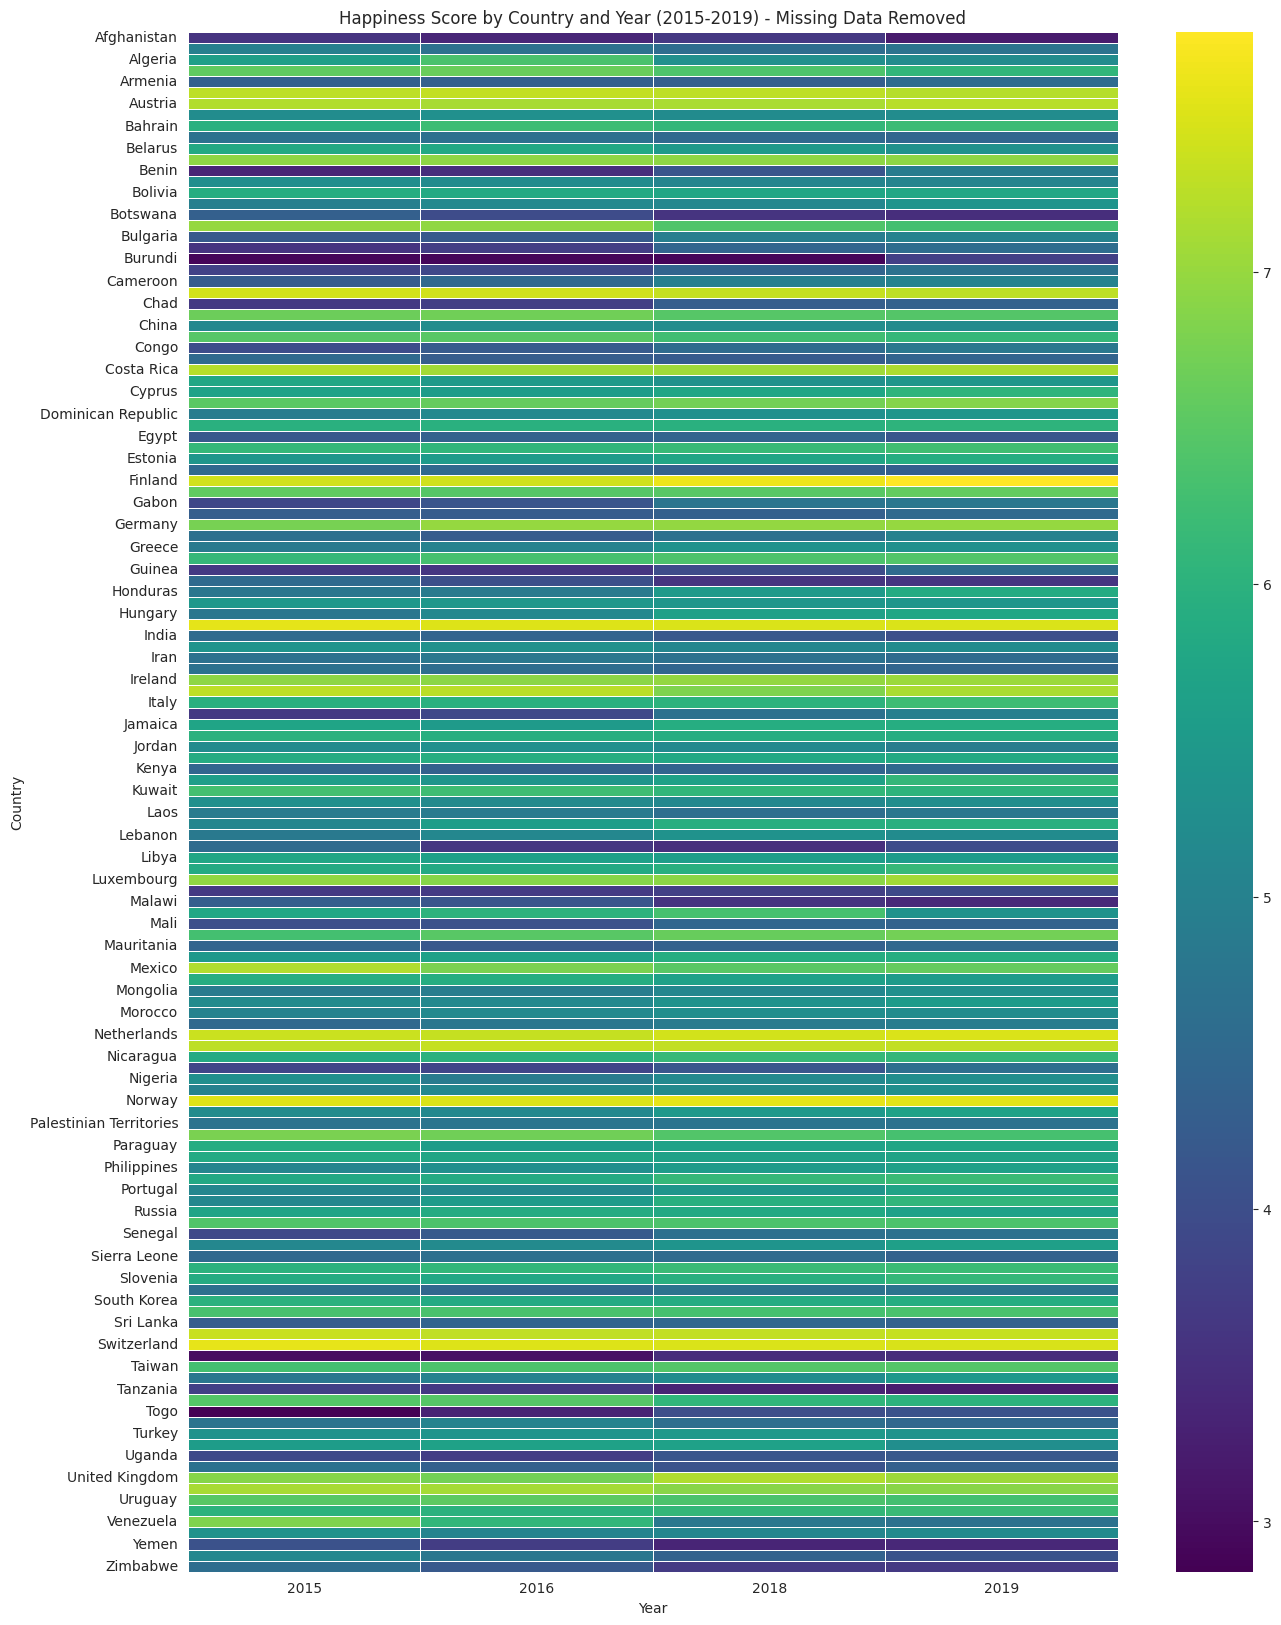

In [ ]:
happiness_pivot = df_grouped.pivot_table(index='country', columns='year', values='happiness_score')
happiness_pivot_cleaned = happiness_pivot.dropna()

plt.figure(figsize=(15, 20))
sns.heatmap(happiness_pivot_cleaned, cmap='viridis', annot=False, fmt=".2f", linewidths=.5)
# Countries with any missing `happiness_score` values were identified and removed from the `happiness_pivot`
plt.title('Happiness Score by Country and Year (2015-2019) - Missing Data Removed')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

# Parametric Estimation (CI)

In [ ]:
# Calculate the sample mean of 'happiness_score'
mean_happiness = df['happiness_score'].mean()

# Calculate the standard deviation of 'happiness_score'
std_happiness = df['happiness_score'].std()

# Calculate the number of observations
n_observations = df['happiness_score'].count()

# Calculate the Standard Error of the Mean (SEM)
sem_happiness = std_happiness / np.sqrt(n_observations)

ci_lower = mean_happiness - (2 * sem_happiness)
ci_upper = mean_happiness + (2 * sem_happiness)

print(f"Sample Mean of Happiness Score: {mean_happiness:.3f}")
print(f"Standard Error of the Mean (SEM) for Happiness Score: {sem_happiness:.3f}")
print(f"95% Confidence Interval (Parametric) for Happiness Score: [{ci_lower:.3f}, {ci_upper:.3f}]")

Sample Mean of Happiness Score: 5.381
Standard Error of the Mean (SEM) for Happiness Score: 0.045
95% Confidence Interval (Parametric) for Happiness Score: [5.291, 5.471]


# Resampling (Without Replacement):


In [ ]:
df = pd.read_csv("happiness_clean_2015_2019_20251110_190504.csv")

# Parameters for resampling
n_iterations = 10000
sample_size = 100

# List to store sample means
sample_means = []

# Run the resampling loop
for _ in range(n_iterations):
    sample = df['happiness_score'].sample(n=sample_size, replace=False)
    sample_means.append(sample.mean())

# Calculate the mean of the stored sample means
resampled_mean = np.mean(sample_means)

# Calculate the standard deviation of the stored sample means (this acts as the Standard Error)
resampled_se = np.std(sample_means)

# Calculate the 95% Confidence Interval using percentiles (non-parametric)
ci_lower_resampled = np.percentile(sample_means, 2.5)
ci_upper_resampled = np.percentile(sample_means, 97.5)

print(f"Resampled Mean of Happiness Score: {resampled_mean:.3f}")
print(f"Resampled Standard Error (SE) of the Mean for Happiness Score: {resampled_se:.3f}")
print(f"95% Confidence Interval (Resampled) for Happiness Score: [{ci_lower_resampled:.3f}, {ci_upper_resampled:.3f}]")

Resampled Mean of Happiness Score: 5.379
Resampled Standard Error (SE) of the Mean for Happiness Score: 0.103
95% Confidence Interval (Resampled) for Happiness Score: [5.174, 5.583]


# Bootstrapping (With Replacement):


In [ ]:
import numpy as np
import pandas as pd

# Ensure df is loaded for this cell
df = pd.read_csv("happiness_clean_2015_2019_20251110_190504.csv")

# Parameters for bootstrapping
n_bootstraps = 10000
sample_size = len(df)

bootstrap_means = []

for _ in range(n_bootstraps):
    bootstrap_sample = df['happiness_score'].sample(n=sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample.mean())

# Calculate the mean of the stored bootstrap means
bootstrapped_mean = np.mean(bootstrap_means)

# Calculate the standard deviation of the stored bootstrap means (this acts as the Bootstrap Standard Error)
bootstrapped_se = np.std(bootstrap_means)

# Calculate the 95% Confidence Interval using percentiles (non-parametric)
ci_lower_bootstrap = np.percentile(bootstrap_means, 2.5)
ci_upper_bootstrap = np.percentile(bootstrap_means, 97.5)

print(f"Bootstrapped Mean of Happiness Score: {bootstrapped_mean:.3f}")
print(f"Bootstrapped Standard Error (SE) of the Mean for Happiness Score: {bootstrapped_se:.3f}")
print(f"95% Confidence Interval (Bootstrapped) for Happiness Score: [{ci_lower_bootstrap:.3f}, {ci_upper_bootstrap:.3f}]")

Bootstrapped Mean of Happiness Score: 5.381
Bootstrapped Standard Error (SE) of the Mean for Happiness Score: 0.045
95% Confidence Interval (Bootstrapped) for Happiness Score: [5.293, 5.469]


# Comparision and interpretation

In [ ]:
print("## Comparison of Statistical Methods")
print("\n### 1. Parametric Estimation (CI)")
print(f"*   **Sample Mean:** {mean_happiness:.3f}")
print(f"*   **Standard Error of the Mean (SEM):** {sem_happiness:.3f}")
print(f"*   **95% Confidence Interval:** [{ci_lower:.3f}, {ci_upper:.3f}]")

print("\n### 2. Resampling (Without Replacement)")
print(f"*   **Resampled Mean:** {resampled_mean:.3f}")
print(f"*   **Resampled Standard Error (SE):** {resampled_se:.3f}")
print(f"*   **95% Confidence Interval (Percentile Method):** [{ci_lower_resampled:.3f}, {ci_upper_resampled:.3f}]")

print("\n### 3. Bootstrapping (With Replacement)")
print(f"*   **Bootstrapped Mean:** {bootstrapped_mean:.3f}")
print(f"*   **Bootstrapped Standard Error (SE):** {bootstrapped_se:.3f}")
print(f"*   **95% Confidence Interval (Percentile Method):** [{ci_lower_bootstrap:.3f}, {ci_upper_bootstrap:.3f}]")

## Comparison of Statistical Methods

### 1. Parametric Estimation (CI)
*   **Sample Mean:** 5.381
*   **Standard Error of the Mean (SEM):** 0.045
*   **95% Confidence Interval:** [5.291, 5.471]

### 2. Resampling (Without Replacement)
*   **Resampled Mean:** 5.379
*   **Resampled Standard Error (SE):** 0.103
*   **95% Confidence Interval (Percentile Method):** [5.174, 5.583]

### 3. Bootstrapping (With Replacement)
*   **Bootstrapped Mean:** 5.381
*   **Bootstrapped Standard Error (SE):** 0.045
*   **95% Confidence Interval (Percentile Method):** [5.293, 5.469]


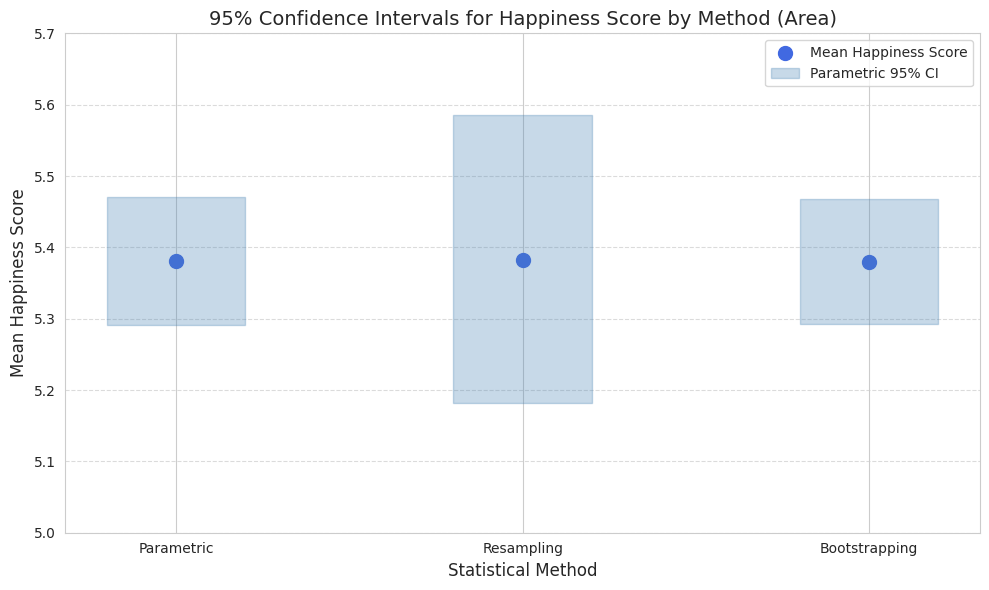

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

x_positions = np.arange(len(ci_df['Method']))
plt.scatter(
    x_positions,
    ci_df['Mean'],
    color='royalblue',
    marker='o',
    s=100,
    label='Mean Happiness Score'
)

for i, row in ci_df.iterrows():
    plt.fill_between(
        [x_positions[i] - 0.2, x_positions[i] + 0.2],
        row['Lower_CI'],
        row['Upper_CI'],
        color='steelblue',
        alpha=0.3,
        label=f'{row['Method']} 95% CI' if i == 0 else ""
    )

plt.title('95% Confidence Intervals for Happiness Score by Method (Area)', fontsize=14)
plt.xlabel('Statistical Method', fontsize=12)
plt.ylabel('Mean Happiness Score', fontsize=12)
plt.ylim(5.0, 5.7)
plt.xticks(x_positions, ci_df['Method'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()